Цель работы: 1) измерение давления насыщенного пара жидкости при разной температуре; 2) вычисление по полученным данным теплоты испарения с помощью уравнения Клапейрона-Клаузиуса.

В работе используются: термостат, герметический сосуд, заполненный водой, отсчётный микроскоп.


Теоретическая часть
Уравнение Клапейрона-Клаузиуса
Если считать что насыщенные пары подчиняются закона Менделеева-Клапейрона, и пренебречь удельным объемом жидкости относительно удельного объема паров то из уравнения Клапейрона-Клаузиуса получаем формулу для удельной теплоты испарения


$$L = \frac{RT^2}{\mu P}\frac{dP}{dT} = - \frac{R}{\mu} \frac{d(ln P)}{d(1/T)}$$
  
Как видим, если измерить зависимость давления насыщенных паров от температуры по формуле можно получить удельную теплоту испарения.

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
from labs import *
from statistics import stdev

In [118]:
sigmah=0.1
sigmaT=0.01
g=9.8154
po=13521.2

In [119]:
nag=pd.read_csv('1.csv')
nag['dh']=abs(nag['h2']-nag['h1'])
nag['sigmadh']=sigmah*np.sqrt(2)
nag['P']=po*g*nag['dh']*0.001
nag['relh']=nag['sigmadh']/nag['dh']
nag['sigmaP']=nag['P']*nag['relh']
nag['lnP']=np.log(nag['P'])
nag['sigmalnP']=nag['sigmaP']/nag['P']
nag['T']=273+nag['T']
nag['1T']=1/nag['T']
nag['sigma1T']=nag['1T']*(sigmaT/nag['T'])
nag

,T,h1,h2,dh,sigmadh,P,relh,sigmaP,lnP,sigmalnP,1T,sigma1T
0,294.02,46.35,20.350,26.000,0.141421,3450.615648,0.005439,18.768875,8.146308,0.005439,0.003401,1.156768e-07
1,295.04,46.90,19.800,27.100,0.141421,3596.603234,0.005219,18.768875,8.187745,0.005219,0.003389,1.148784e-07
2,296.00,47.65,19.600,28.050,0.141421,3722.683421,0.005042,18.768875,8.222200,0.005042,0.003378,1.141344e-07
3,297.00,48.10,19.150,28.950,0.141421,3842.127809,0.004885,18.768875,8.253782,0.004885,0.003367,1.133671e-07
4,298.00,48.95,18.550,30.400,0.141421,4034.565989,0.004652,18.768875,8.302654,0.004652,0.003356,1.126075e-07
5,299.00,48.95,17.800,31.150,0.141421,4134.102979,0.004540,18.768875,8.327026,0.004540,0.003344,1.118556e-07
6,300.00,49.65,17.050,32.600,0.141421,4326.541159,0.004338,18.768875,8.372524,0.004338,0.003333,1.111111e-07
7,301.00,50.40,16.300,34.100,0.141421,4525.615139,0.004147,18.768875,8.417509,0.004147,0.003322,1.103741e-07
8,302.00,51.25,15.600,35.650,0.141421,4731.324918,0.003967,18.768875,8.461961,0.003967,0.003311,1.096443e-07
9,303.00,52.60,14.150,38.450,0.141421,5102.929680,0.003678,18.768875,8.537570,0.003678,0.003300,1.089218e-07


In [120]:
ohl=pd.read_csv('2.csv')
ohl['dh']=abs(ohl['h2']-ohl['h1'])
ohl['sigmadh']=sigmah*np.sqrt(2)
ohl['P']=po*g*ohl['dh']*0.001
ohl['relh']=ohl['sigmadh']/ohl['dh']
ohl['sigmaP']=ohl['P']*ohl['relh']
ohl['lnP']=np.log(ohl['P'])
ohl['sigmalnP']=ohl['sigmaP']/ohl['P']
ohl['T']=273+ohl['T']
ohl['1T']=1/ohl['T']
ohl['sigma1T']=ohl['1T']*(sigmaT/ohl['T'])
ohl

,T,h1,h2,dh,sigmadh,P,relh,sigmaP,lnP,sigmalnP,1T,sigma1T
0,313.00,62.10,1.825,60.275,0.141421,7999.456085,0.002346,18.768875,8.987129,0.002346,0.003195,1.020731e-07
1,312.00,63.20,3.850,59.350,0.141421,7876.693798,0.002383,18.768875,8.971664,0.002383,0.003205,1.027285e-07
2,311.00,61.90,5.050,56.850,0.141421,7544.903831,0.002488,18.768875,8.928628,0.002488,0.003215,1.033902e-07
3,309.98,60.75,6.300,54.450,0.141421,7226.385464,0.002597,18.768875,8.885494,0.002597,0.003226,1.040717e-07
4,308.96,59.55,7.550,52.000,0.141421,6901.231297,0.002720,18.768875,8.839455,0.002720,0.003237,1.047600e-07
5,307.96,58.35,8.700,49.650,0.141421,6589.348729,0.002848,18.768875,8.793210,0.002848,0.003247,1.054415e-07
6,306.99,57.35,9.700,47.650,0.141421,6323.916756,0.002968,18.768875,8.752094,0.002968,0.003257,1.061088e-07
7,305.95,56.40,10.850,45.550,0.141421,6045.213184,0.003105,18.768875,8.707022,0.003105,0.003269,1.068314e-07
8,304.94,55.40,11.700,43.700,0.141421,5799.688609,0.003236,18.768875,8.665560,0.003236,0.003279,1.075403e-07
9,303.98,54.45,12.600,41.850,0.141421,5554.164034,0.003379,18.768875,8.622303,0.003379,0.003290,1.082206e-07


(-4022.9±43.5)

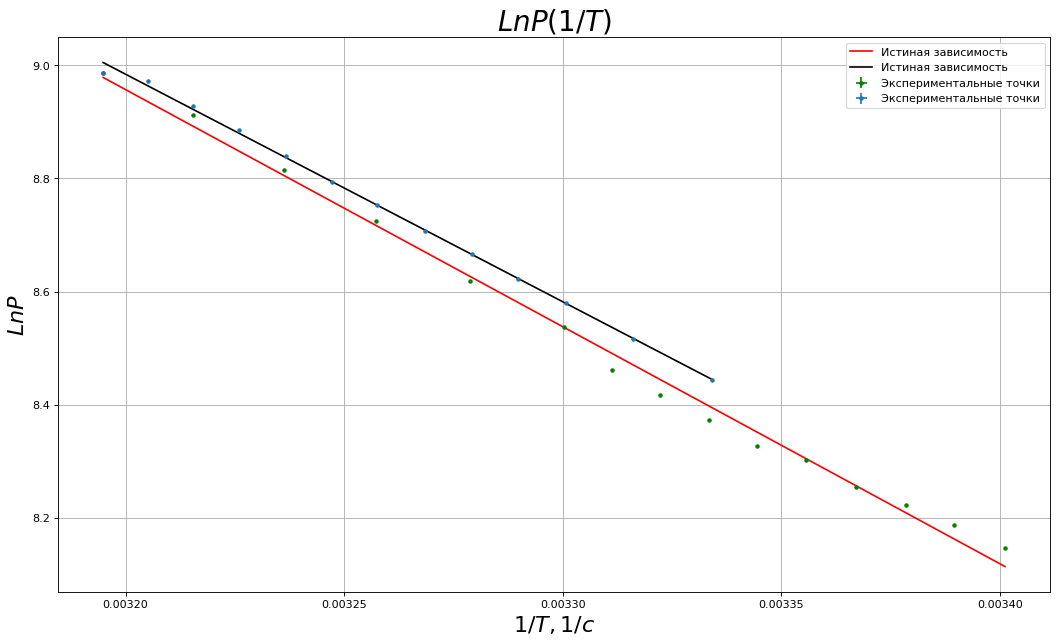

In [121]:
k1, b1 = curve_fit(line, nag['1T'], nag['lnP'])
k2, b2 = curve_fit(line, ohl['1T'], ohl['lnP'])
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=nag['1T'], xerr=nag['1T'].agg(get_err), y=nag['lnP'], yerr=nag['lnP'].agg(get_err), fmt='.', label='Экспериментальные точки', color="green")
plt.plot(nag['1T'].agg(get_var), line(nag['1T'].agg(get_var), k1, b1), label="Истиная зависимость", color="red")
plt.errorbar(x=ohl['1T'], xerr=ohl['1T'].agg(get_err), y=ohl['lnP'], yerr=ohl['lnP'].agg(get_err), fmt='.', label='Экспериментальные точки')
plt.plot(ohl['1T'].agg(get_var), line(ohl['1T'].agg(get_var), k2, b2), label="Истиная зависимость", color="black")
plt.title(r"$LnP(1/T)$", fontsize=25)
plt.xlabel(r"$ 1/T, 1/c$", fontsize=20)
plt.ylabel(r"$LnP$", fontsize=20)
plt.grid(True)
plt.legend() 
k2

In [122]:
k1

(-4192.2±84.2)

$ a_{\text{нагр}_1}=-5133.2 ± 44.1 $, $a_{\text{охл}_2} = -4921.1±31.7$





$$L = \frac{RT}{P} \frac{dP}{dT} = -R \frac{d(\ln P)}{d(1/T)} $$

In [123]:
L1=k1*(-8.31)/1000
L2=k2*(-8.31)/1000
L1

(34.8±0.7)

In [124]:
L2

(33.4±0.4)

AttributeError: 'Value' object has no attribute 'get_var'

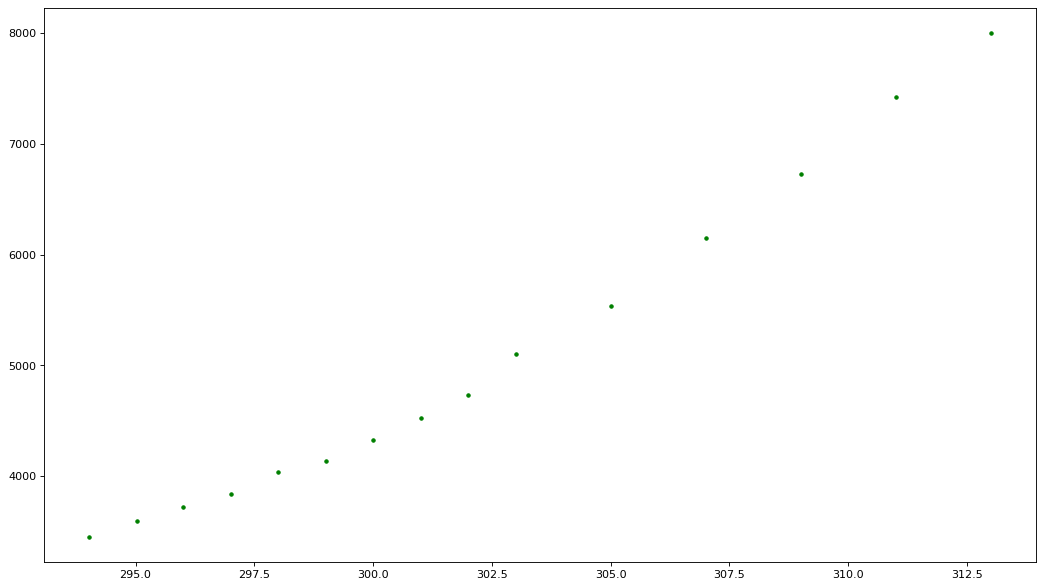

In [125]:
def f(x, a, b):
    return a * (x**2) + b
k3, b3 = curve_fit(f, nag['T'], nag['P'])
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=nag['T'], xerr=nag['T'].agg(get_err), y=nag['P'], yerr=nag['P'].agg(get_err), fmt='.', label='Экспериментальные точки', color="green")
plt.plot(nag['T'].agg(get_var), f(nag['T'].agg(get_var), k3.get_var, b3), label="Истиная зависимость", color="red")
plt.title(r"$LnP(1/T)$", fontsize=25)
plt.xlabel(r"$ 1/T, 1/c$", fontsize=20)
plt.ylabel(r"$LnP$", fontsize=20)
plt.grid(True)
plt.legend() 